# Estimation population and samples

If we want to tell what a population was like by just taking one sample is done by taking point estimators of statistics.
POINT ESTIMATORS of a population parameter is some function or calculation that can be used to estimate the value of Population Parameter.
point estimator of population mean,proportion is equal to their sample mean and proportion
There are two ways of estimating population statistics:

The first way of estimating population statistics is to use point estimators. Point estimators give you a way of estimating the precise value for the population statistics. It’s the best guess you can possibly make based on the sample data.

You also know how to come up with confidence intervals for the population statistics. Rather than come up with a very precise estimate for the population statistics, you now know how to find a range of values for the population statistic that you can feel truly confident about.

# Confidence Interval(C.I)

QUESTION: If we select 10 states literacy rates of india.Find the 95% confidence interval for population mean litercy rates of all states ofindia.
assume the literacy rates are approximately normally distributed.    

In [1]:
from scipy.stats import norm

In [2]:
norm.interval(alpha = 0.95, loc = 0, scale = 1)

(-1.959963984540054, 1.959963984540054)

In [3]:
norm.interval(alpha = 0.95)[1]

1.959963984540054

# Step 1: Choose your population statistics

The first step is to pick the statistic we want to construct a confidence interval for. We want to construct a confidence interval for the mean literacy rates of 5 states, so we need to construct a confidence interval for the population mean, μ.

In [9]:
import numpy as np
import thinkplot
import thinkstats2

In [10]:
def SimulateSample(mu=0, sigma=1, n=10, iters=1000):
    xbars = []
    for _ in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

In [14]:
xbars = SimulateSample(mu=0.5, sigma=np.sqrt(0.09), n=10, iters=10000)

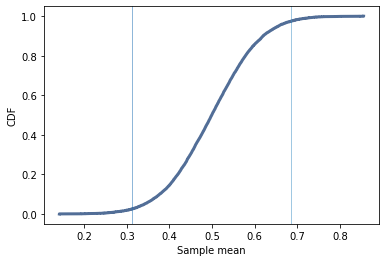

In [15]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.axvline(cdf.ConfidenceInterval(95)[0])
thinkplot.axvline(cdf.ConfidenceInterval(95)[1])
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [16]:
cdf.ConfidenceInterval(95)

(0.3124558563960532, 0.6853788443318953)

# Step 2: Find the sampling Distribution

𝑋¯
follows the t-distribution when the sample is small

The t-distribution is a probability distribution that specializes in exactly the sort of situation we have here. It’s the distribution that 𝑋¯
follows where the population is normal, 𝜎2

is unknown, and you only have a small sample at your disposal.

The t-distribution looks like a smooth, symmetrical curve, and it’s exact shape depends on the size of the sample. When the sample size is large, it looks like the normal distribution, but when the sample size is small, the curve is flatter and has slightly fatter tails. It takes one parameter, 𝜈
, where 𝜈 is equal to n – 1. n is the size of the sample, and 𝜈 is called the number of degrees of freedom.

Find the standard score for the t-distribution

We calculate the standard score for the t-distribution in the same way we did for the normal distribution. As with the the normal distribution, we standardize by subtracting the expectation of the sampling distribution and then dividing by its standard deviation. The only difference is that we represent the result with T instead of Z, as we’re going to use it with the t-distribution.

We need to find the distribution of 𝑋¯
, so this means we need to use the expectation and standard deviation of 𝑋¯. The expectation of 𝑋¯

is μ, and the standard deviation is σ/n. As we need to estimate the value of σ with s, this means that the standard score for the t-distribution is given by

𝑇=𝑋¯−𝜇𝑠𝑛√

All we need to do is substitute in the values for 𝑋¯
, 𝜎̂ 

, and n.

Let’s see if you can apply this to the literacy rate sample. There are 10 states literacy rates in the sample, where 𝑥¯
= 0.5oz and 𝑠2 = 0.09. What’s the value of 𝜈

and what’s T?

There are 10 states in the sample, and 𝜈
= n - 1. This means that the value of 𝜈

is 9.

T is given by

𝑇=𝑋¯−𝜇𝑠𝑛√

𝑇=𝑋¯−𝜇0.09/10√

𝑇=𝑋¯−𝜇0.0949

# Step 3:Decide on the level of Confidence

The level of confidence says how sure you want to be that the confidence interval contains the population statistic, and it helps us figure out how wide the confidence interval needs to be. As before, let’s have a confidence level of 95% for the population mean. This means that the probability of the population mean being inside the confidence interval is 0.95.



# Step 4: Find the confidence limits

In [17]:
from scipy import stats

by using t-Distribution tables

In [18]:
# Population CI
conf_int = stats.t.interval(0.95, loc=0.5, scale=0.09, df = 9)
conf_int

(0.29640585535331077, 0.7035941446466892)